# Семинар №3. Введение в машинное обучение

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import matplotlib.patches as mpatches

# Постановка задачи
Пусть есть

$\mathbb{X}$ - пространство `объектов` <br>
$\mathbb{Y}$ - пространство `ответов` <br>
$\mathcal{F}: \mathbb{X} \rightarrow \mathbb{Y}$ - неизвесная зависимость (target function)

## Дано
`Обучающая выборка` (training samples) ($X_{train}$, $y_{train}$):

$ X_{train} = \{ x_1, \ldots, x_n \}$ , где 
* $x_i \in \mathbb{X}$ - объекты

$ y_{train} = \{y_1, \ldots, y_n \}$ , где 
* $y_i \in \mathbb{Y}$ - ответы
* $y_{i} = \mathcal{F}(x_i)$

`Тестовая выборка` (test samples) $X_{test}$

$ X = \{  x_1, \ldots, x_l \}$ , где 
* $x_i \in \mathbb{X}$ - объекты


## Что хотим найти?
$y_{test}$ - подходящие `ответы` для $X_{test}$.

Для этого нам нужна $\mathcal{F}$. 

Но в реальности мы не всегда можем найти идеальную функцию, поэтому

$a: \mathbb{X} \to \mathbb{Y}$ - **алгоритм**, `приближающий` $a(x_i)$ к $y_i$.

## Что значит приближать?

Пусть $Q(a,X_{train}, y_{train})$ - **функционал ошибки**.

Нужно найти такое $a$, которое минимизирует $Q(a,X_{train}, y_{train})$. Проще говоря

$$a = argmin_{a \in \mathbb{A}}Q(a,X_{train}, y_{train})$$

* где $\mathbb{A}$ - `пространство всех возможных алгоритмов`.


## Пример
* $\mathbb{X} = \mathbb{R}$
* $\mathbb{Y} = \mathbb{R}$
* $\mathbb{A}$ - полиномы степени 1. (Линейная регрессия: $a(x) = w_0x + w_1$)
* $X_{train} = \{(1, 1), (2, 2)\}$
* $Q(a,X) = \sum_{i=1}^{n}(a(x_i) - y_i)^2$ 

Мы хотим найти такое $a$ в $\mathbb{A}$, чтобы сумма квадратов отклонений от реальных ответов была минимальной. 

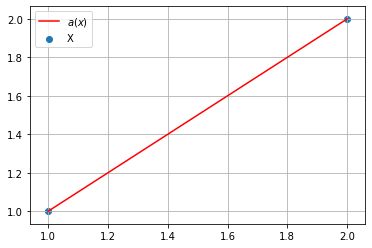

In [6]:
X = np.array([[1], [2]])
y = np.array([1,2])
plt.scatter(X,y, label='X')
plt.plot(X, y, c='red', label='$a(x)$')
plt.legend()
plt.grid()

Очевидный и точный ответ $a(x) = x$. Он минимизирует $Q(a, X)$ до 0.

Однако если добавим в выборку точку $(3, 4)$, то ответ будет другим и функционал не будет достигать 0 ни при каком алгоритме из выбранного множества. (Какое множество можно выбрать, чтобы функционал достигал 0?)

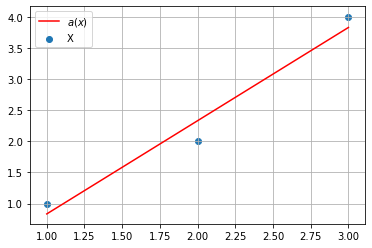

In [10]:
from sklearn.linear_model import LinearRegression
X = np.array([[1], [2], [3]])
y = np.array([1, 2, 4])
model = LinearRegression().fit(X, y)
ax = model.predict(X)
plt.scatter(X, y, label='X')
plt.plot(X, ax, c='red', label='$a(x)$')
plt.legend()
plt.grid()


С другой стороны, мы можем выбрать функцинал, который просто всегда равен 0. Вопрос в том, будет ли в нем хоть какой-то смысл.

## Итог

В задаче МО нужно выбрать такие $\mathbb{A}$ и $Q(a,X)$, а потом найти наилучший алгоритм, решающий задачу в этих условиях.

Собственно творческий процесс МО происходит именно здесь: нам нужно как-то интерпретировать `хорошо решать задачу` в терминах $\mathbb{A}$ и $Q(a,X)$. 

А дальше уже техническая часть нахождения $a$. Которая и назвается `обучением`

# Практика

## Что такое Объекты $\mathbb{X}$?

Пусть объект $x_i$ - это вектор признаков $(f_1^i,\ldots, f_m^i)$

Что такое признаки (features)? Некие элементарные объекты.
Типы признаков: 
- `Бинарные`: $\{0, 1\}$
- `Количественные`: $f(x) \in \mathbb{Q}, \mathbb{R}, \mathbb{C}$
- `Категориальные`: *{ Пол, Город, Страна, Персонаж в Dota2 и т.д. }*
- `Порядковые`: *{ Уровень образования(Бакалавр, Магистр,...), Ранг в CSGO и т.д. }*


In [2]:
X_data = pd.DataFrame({'numeric':np.arange(0,1,0.3), 
                       'binary': np.arange(0,1,0.3) > 0.4,
                       'category': np.array(['dog', 'cat', 'parrot', 'shark']),
                       'serial':np.array(['bachelor', 'magister', 'assistant', 'doctor'])})

In [3]:
X_data

,numeric,binary,category,serial
0,0.0,False,dog,bachelor
1,0.3,False,cat,magister
2,0.6,True,parrot,assistant
3,0.9,True,shark,doctor


## Что такое Ответы $\mathbb{Y}$?

Тоже признак или вектор признаков. (Но пока будем говорить только об одном признаке)

In [4]:
Y_data = pd.DataFrame({'numeric':np.arange(0,1,0.3), 
                       'binary': np.arange(0,1,0.3) > 0.4,
                       'category': np.array(['dog', 'cat', 'parrot', 'shark']),
                       'serial':np.array(['bachelor', 'magister', 'assistant', 'doctor'])})

In [5]:
Y_data['numeric']

0    0.0
1    0.3
2    0.6
3    0.9
Name: numeric, dtype: float64

# Задачи МО

В основе, есть две задачи МО
* **Классификация** ($\mathbb{Y}$ - конечное)
* **Регрессия** ($\mathbb{Y}$ - бесконечное)


# Классификация

## Генерация выборки
Сгенерируем выборку для 2 классов. 

In [6]:
np.random.seed(1337)
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2)) #первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2)) #второй класс
X_clf = np.vstack([a, b]) #двумерный количественный признак
y_clf = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

(400, 2) (400,)


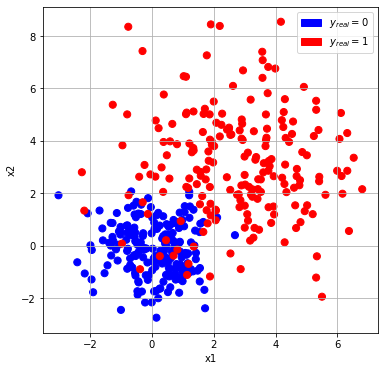

In [182]:
print(X_clf.shape, y_clf.shape)
plt.figure(figsize=(6, 6))
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
blue_patch = mpatches.Patch(color='blue', label='$y_{real}=0$')
red_patch = mpatches.Patch(color='red', label='$y_{real}=1$')
plt.legend(handles=[blue_patch, red_patch])
plt.grid()

### Страшный (нет) код для красивых картинок далее.

`plot_model` принимает на вход модель, $X_{train}$, $y_{train}$. Дальше он обучает модель, предсказывает значение для каждой точки плоскости и отрисовывает данную классификацию.

In [239]:
def get_grid(data, border=1., step=.01): #получаем все точки плоскости
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))

def plot_model(X_train, y_train, clf, proba=False):
    clf.fit(X_train, y_train) # обучаем модель
    xx, yy = get_grid(X_train) #получаем все точки плоскости
    
    # предсказываем значения для каждой точки плоскости
    
    if proba: # нужно ли предсказывать вероятности 
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Отрисовка плоскости
    
    plt.figure(figsize=(6, 6))
    plt.pcolormesh(xx, yy, predicted, cmap='spring')
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    
    # Отрисовка точек
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='spring', edgecolors='b')
    colors = ['purple', 'yellow', 'orange']
    patches = []
    for yi in np.unique(y_train):
        patches.append(mpatches.Patch(color=colors[int(yi)], label='$y_{pred}=$'+str(int(yi))))
    plt.legend(handles=patches)
    return clf

# Обучение!

Сейчас будем перебирать разные ~~черные ящики~~ `пространства алгоритмов` $\mathbb{A}$, чтобы решить задачу классификации. 

Мы нигде не будем углубляться во внутреннее устройство каждого из алгоритмов. Об этом мы поговорим на след. семинарах. 

## [Scikit-learn или просто sklearn](https://scikit-learn.org/stable/index.html) 
библиотека, в которой реализованы стандартные алгоритмы машинного обучения. 


## [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier)

Основная идея: 
* сохраняет в себе все точки выборки
* когда хотим предсказать следующую точку, ищем k ближайших точек (по умолчанию точек 5, а метрика расстояния - эвклидова)
* из какого класса точек среди ближайших больше - тот класс и присваивается новой точке

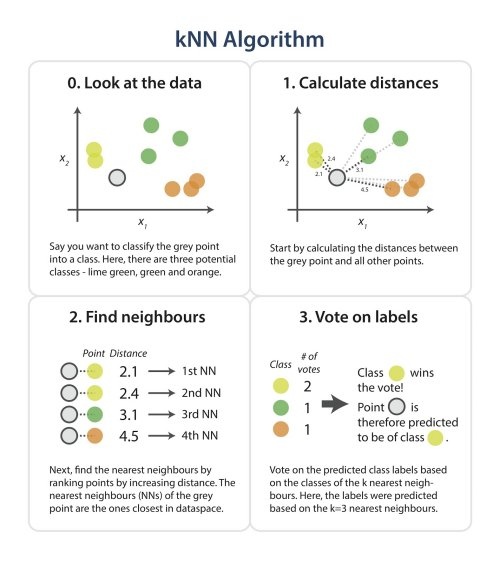

In [10]:
Image('resources/knn.jpg')

### 1.Импортируем классификатор

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN

### 2.Обучаем

In [12]:
clf_knn = KNN() # получаем экземпляр модели
clf_knn.fit(X_clf, y_clf) # обучаем модель на данных

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 3.Предсказываем результат

In [13]:
clf_knn.predict(np.array([[2, 0], [0, 2]]))

array([1., 0.])

### 4.Предсказываем вероятности попадания в класс (не всегда доступен этот метод)

In [14]:
clf_knn.predict_proba(np.array([[2,0],[0,2]]))

array([[0.4, 0.6],
       [0.6, 0.4]])

### 5.Предскажем результат для всей плоскости

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

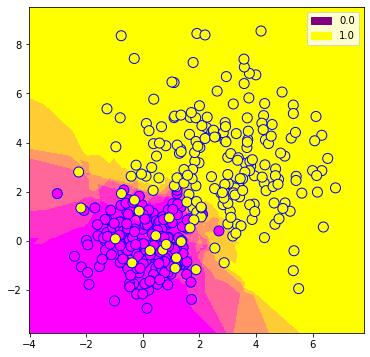

In [234]:
plot_model(X_clf, y_clf, clf_knn, proba=True)

## [DecisionTreeClassifier](https://scikit-learn.org/0.20/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Основная идея:
* выбираем какой-то признак и строим правило вида $f_i < const_i$ (о том как строится правило поговорим в другой раз)
* если для объекта булева функция выполняется то он спускается в правое поддерево, иначе в левое поддерево
* операция создания правила повторяется, пока в листовых вершинах выборка не будет идеально разделима (возможны другие ограничения: достигнута максимальная длина дерева)
* чтобы предсказать класс - пускаем новый объект с начала дерева выбора и смотрим в какую листовую вершину он попадет

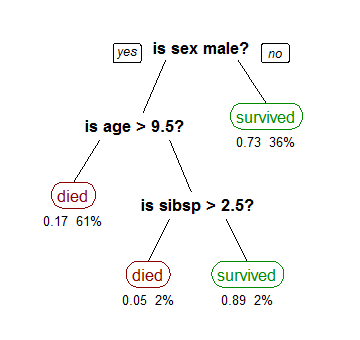

In [16]:
Image('resources/tree2.png')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

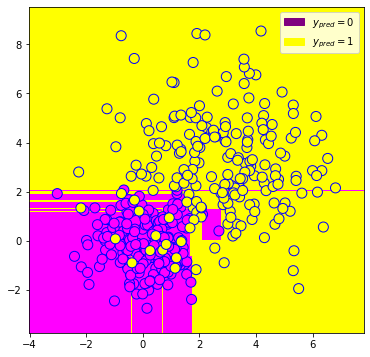

In [185]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf_dtc = DTC()
plot_model(X_clf, y_clf, clf_dtc)

Разделение происходит с помощью линий паралельных осям координат: отображение правил вида $f_i < const_i$

## [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression)

Строит гиперплоскость (в случае размерности 2 - прямую) $a(x) = w_0 + w_1x_1 + \ldots + w_nx_n$, которая с наименьшей `ошибкой` разделяет классы.

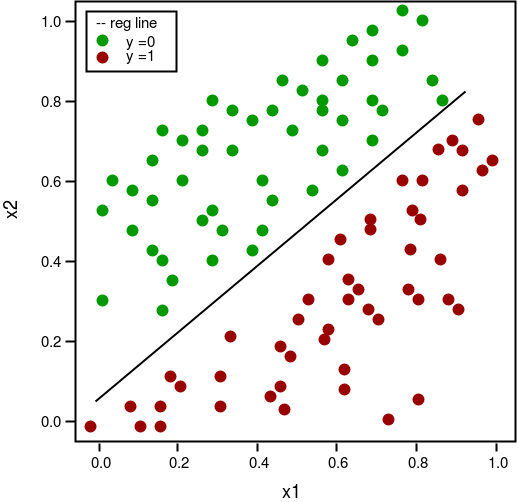

In [148]:
Image('resources/logreg.png', width=400)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

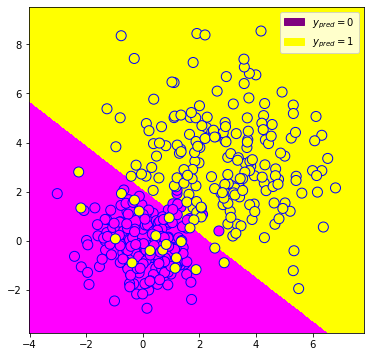

In [186]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
plot_model(X_clf, y_clf, log_reg)

# Регрессия

С классификацией разобрались. Теперь давайте порешаем задачу регрессии.

## Генерация

Создадим функцию $\mathcal{F}(x) = \sqrt{x} + sin(x)$ и добавим к ней шум

In [129]:
def f(x):
    return np.sqrt(x) + np.sin(x)

vf = np.vectorize(f)
rng = np.random.RandomState(1)

X_reg = np.arange(0, 10, 0.2)[:, np.newaxis]
y_reg = vf(X_reg) + (rng.rand(50)[:,np.newaxis] / 4) #добавляем шумы

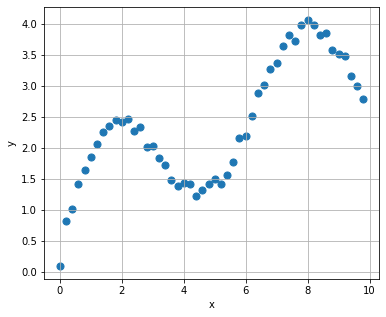

In [130]:
plt.figure(figsize=(6, 5))
plt.scatter(X_reg, y_reg, cmap='bwr', s=50, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [131]:
def plot_reg(X, y, clf_dtc, X_test):
    clf_dtc.fit(X, y)
    Y_test = clf_dtc.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, cmap='bwr', s=50, alpha=1)
    plt.plot(X_test, Y_test, color='r', alpha=1)
    plt.grid()

## [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Идея: находим k ближайших соседей к новой точке и берем их **средние** координаты.

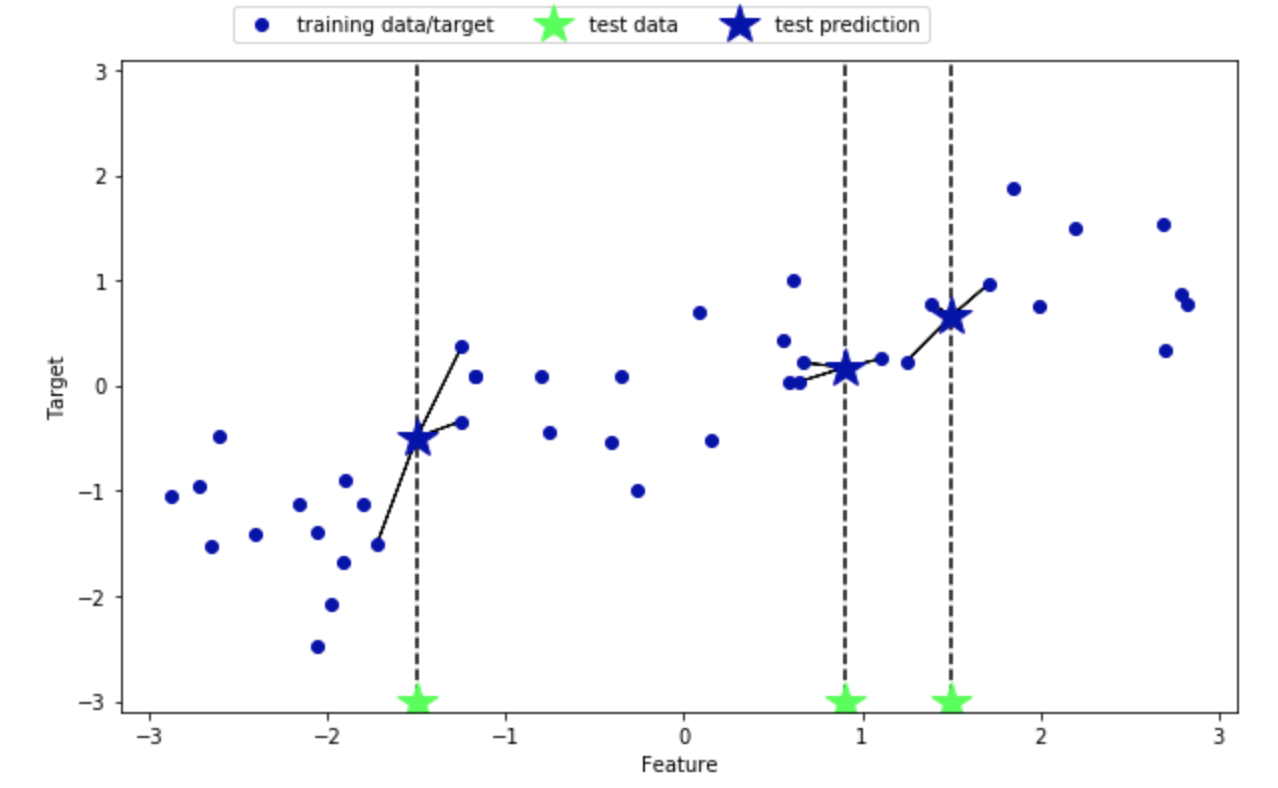

In [146]:
Image('resources/knnreg.png', width=500)

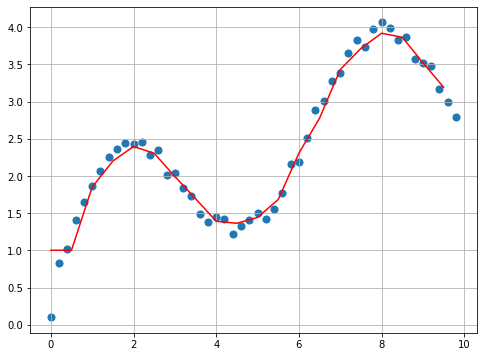

In [139]:
from sklearn.neighbors import KNeighborsRegressor as KNR
clf_knd = KNR(n_neighbors=5)
X_test = np.arange(0,10, 0.5)[:,np.newaxis]
plot_reg(X_reg, y_reg, clf_knd, X_test)

## [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Основная идея: опять же создаем дерево правил, но теперь, при попадании в листы, мы берем **среднее** всех объектов, которые тоже попали в этот лист. 

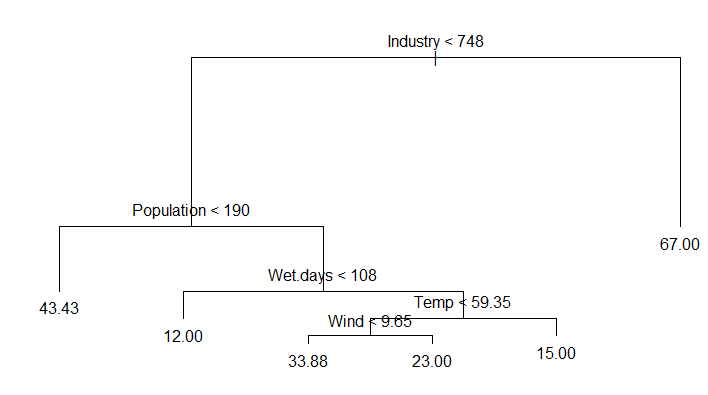

In [150]:
Image('resources/treereg.png')

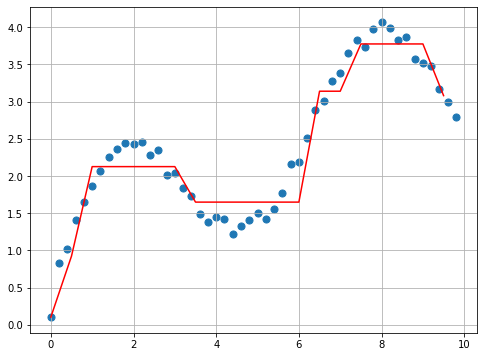

In [151]:
from sklearn.tree import DecisionTreeRegressor as DTR
clf_dtr = DTR(criterion='mse', max_depth=3)
X_test = np.arange(0,10, 0.5)[:,np.newaxis]
plot_reg(X_reg, y_reg, clf_dtr, X_test)

## [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Строит гиперплоскость (в случае размерности 2 - прямую) $a(x) = w_0 + w_1x_1 + \ldots + w_nx_n$, которая с наименьшей `ошибкой` **приближается** к точкам.

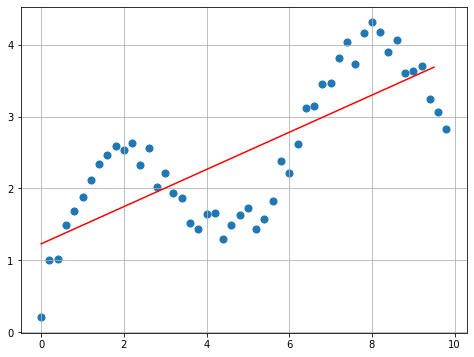

In [84]:
from sklearn.linear_model import LinearRegression as LR
reg_lr = LR()
X_test = np.arange(0, 10, 0.5)[:,np.newaxis]
plot_reg(X_reg, y_reg, reg_lr, X_test)

Что-то неочень:) Но на самом деле логично. Линейная регрессия - пространство алгоримов полинов 1 степени. ($w_0x + w_1$). Как же мы можем улучшить данный алгорим? 

### Вы заметили, что для каждого классификатора есть свой регрессор? 

## А где же функционал?

Заметим, что мы пока нигде не перебираем $Q(a,X)$. Хотя можем.

На следующем примере мы выберем 2 функционала, по которым строятся правила дерева решений. Пока не вдаемся в смысл как они это делают. Главное - мы сами передаем функционал как параметр в модель. 

In [152]:
reg_dtr_mse = DTR(criterion='mse', max_depth=5) #default
reg_dtr_mae = DTR(criterion='mae', max_depth=5)

$$MSE(a,X) = \frac{1}{n}\sum_{i=1}^{n}(a(x_i) - y_i)^2$$
$$MAE(a,X) = \frac{1}{n}\sum_{i=1}^{n}|a(x_i) - y_i|$$

Задачу регрессии (и классификации) можно создавать прямо из коробки

In [161]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_targets=1, noise = 30)

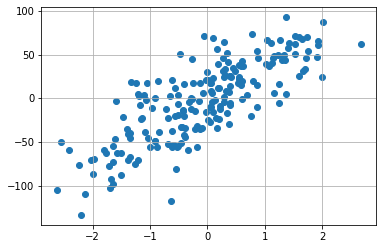

In [162]:
plt.scatter(X,y)
plt.grid()

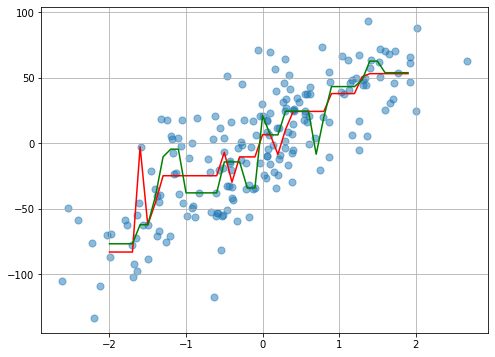

In [163]:
X_test = np.arange(-2, 2, 0.1)[:,np.newaxis]

reg_dtr_mse.fit(X, y)
Y_mse = reg_dtr_mse.predict(X_test)

reg_dtr_mae.fit(X, y)
Y_mae = reg_dtr_mae.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(X, y, cmap='bwr', s=50, alpha=0.5)
plt.plot(X_test, Y_mse, 'r', X_test, Y_mae, 'g')
plt.grid()

В основном класс алгоритмов уже знает, какой функционал ему лучше минимизировать. Иногда мы можем сами его настраивать среди возможных вариантов.

## Как мы можем влиять на пространство алгоритмов? 
Например уменьшить его, чтобы задача решалась быстрее или совсем поменять, чтобы найти новые решения?

# Гиперпараметры и параметры

* **Гиперпараметры** - свойства пространства алгоритмов, в котором мы ищем алгоритм. **Не изменяются** на протяжении `обучения`.
* **Параметры** - внутренние параметры алгоритма, **изменение** которых и есть процесс `обучения`.

Например: 
* гиперпараметр - количество ближайших соседей в алгоритме KNN
* параметр - коэффициенты прямой в Линейной регрессии

Как видно на примере выше, гиперпараметром алгоритма является и функционал минимизации.

## Пример. Дерево решений. Цветки Iris.

Дерево решений - алгоритм, который строит дерево, в вершинах которого находится булева функция от признаков объекта, которая выбирает в какую из вершин далее он пойдет.
* **Гиперпараметры**: функционал, глубина дерева, количество листов и.т.д.
* **Параметры**: булевы функции, которые строятся по ходу построения дерева

In [215]:
from sklearn.datasets import load_iris # в sklearn есть встроенные датасеты
iris=load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                         columns= iris['feature_names'] + ['target'])
iris_data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


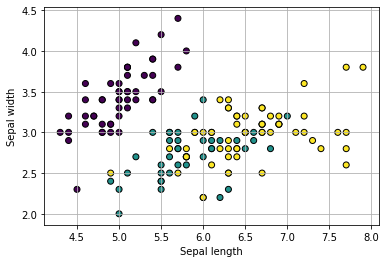

In [216]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(6, 4))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid()

### Обучим 2 разных классификатора, меняя гиперпараметры

In [243]:
clf_1 = DTC(max_depth=2, max_leaf_nodes=3)
clf_2 = DTC(max_depth=3, max_leaf_nodes=5)
clf_1.fit(iris.data, iris.target)
clf_2.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [244]:
def create_tree_image(clf):
    from sklearn.tree import export_graphviz
    export_graphviz(clf, out_file='tree.dot', feature_names = iris.feature_names,
                    class_names = iris.target_names,
                    rounded = True, proportion = False, precision = 2, filled = True)
    from subprocess import call
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in python
    plt.figure(figsize = (9, 7))
    plt.imshow(plt.imread('tree.png'))
    plt.axis('off');
    plt.show();

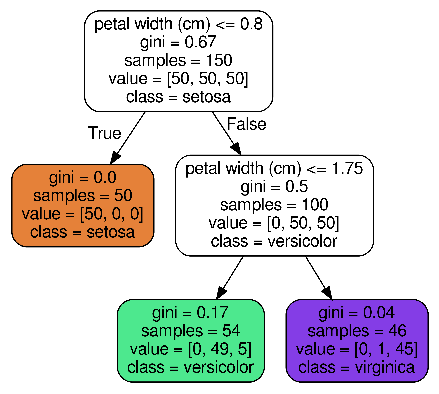

In [245]:
create_tree_image(clf_1)

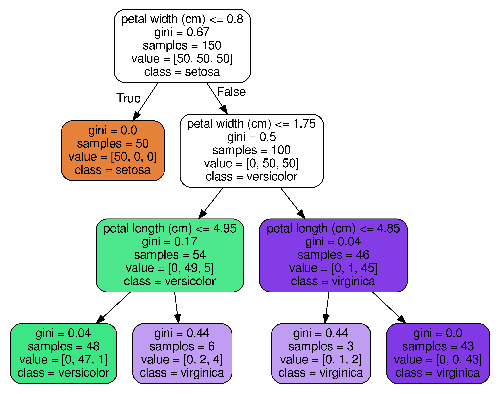

In [246]:
create_tree_image(clf_2)

Получили 2 дерева разной высоты, потому что изначально задали такие максимальные высоты у классификаторов. 

### Параметры меняются в зависимости от гиперпараметров - булевы функции в 2-х деревьях разные.

## А какой из этих 2-х классификаторов в итоге лучше?

С одной стороны очевидно, что чем больше глубина дерева, тем большее пространство алгоритмов мы рассматриваем, а значит можем найти лучший алгоритм. 

Но с другой стороны, мы можем найти такой алгоритм, который показывает себя хорошо на тренировачной выборке, но с другими значениями в реальности работает крайне плохо. Такая ситуация называется `Переобучением` (Overfitting)

# Переобучение, шумы и выбросы.

Вернемся к примеру классификации, который мы рассматривали выше.

In [172]:
np.random.seed(1337)
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2)) #первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2)) #второй класс
X_clf = np.vstack([a, b]) #двумерный количественный признак
y_clf = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

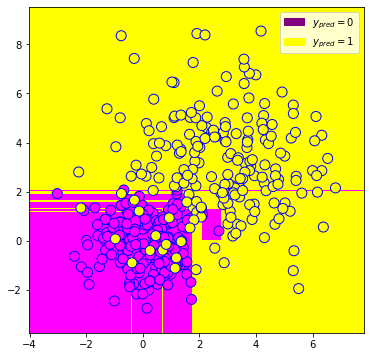

In [187]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf_dtc = DTC()
plot_model(X_clf, y_clf, clf_dtc)

Заметим, что данное разбиение слишком сильно опирается на тренировачную выборку: есть области желтого внутри фиолетового. И новый тестовый объект будет некорректно классифицироваться из-за этого.

In [189]:
clf_dtc = DTC().fit(X_clf, y_clf)
y_pred = clf_dtc.predict([[2.1, 0.4]])[0]
y_pred

0.0

Что вообще говоря не корректно (точка попала в квадратик слева от общей массы точек).

Такой эффект называется **переобучением** - когда модель слишком сильно подстраивается под обучающую выборку и дает некорректный ответ на тестовой.

**Переобучение** может возникать в 2х случаях:
 * Недостаточное количество данных в выборке, тогда для одиних данных остается большое пространство выбора алгоритмов и не факт, что полученный алгоритм будет наилучшим.
 * Если в выборке присутствует много `шума` или есть `выбросы`.

`Шум` - небольшие колебания данных, вызванные обычно неточностью компьтеров и невозможностью поерить все `точно`. Можно считать, что любые данные идут с определенной долей шума.

`Выброс` - серьезное отклонение в данных вызванное ошибками в наблюдениях.

На рисунке сверху боковой квадрат сформировался из-за серьезного шума, который в данном случае сработал как выброс.


Чтобы избавиться от этого эффекта необходимо упростить модель. Возьмем `max_depth=3`.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

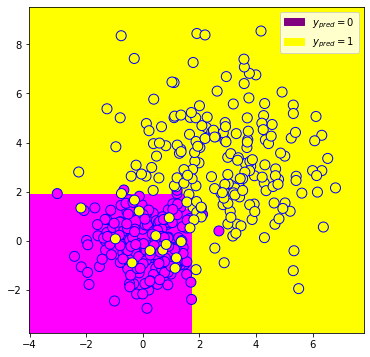

In [191]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf_dtc = DTC(max_depth=3)
plot_model(X_clf, y_clf, clf_dtc)

Мы проигнорировали ответы для нескольких выбросов, зато получили более вероятный ответ. 

Однако нельзя сильно упрощать модель (`max_depth=1`), это может вызвать другую крайность - **недообучение**.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

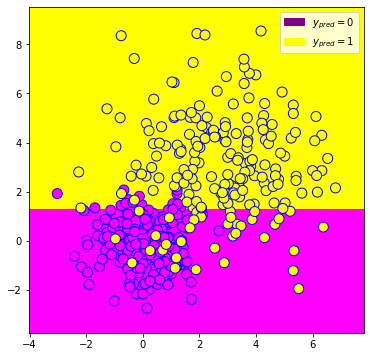

In [192]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf_dtc = DTC(max_depth=1)
plot_model(X_clf, y_clf, clf_dtc)

С одним правилом выбора так же получили совсем некорректный ответ.

Для регресии такой эффект можно также увидеть на след. картинках.

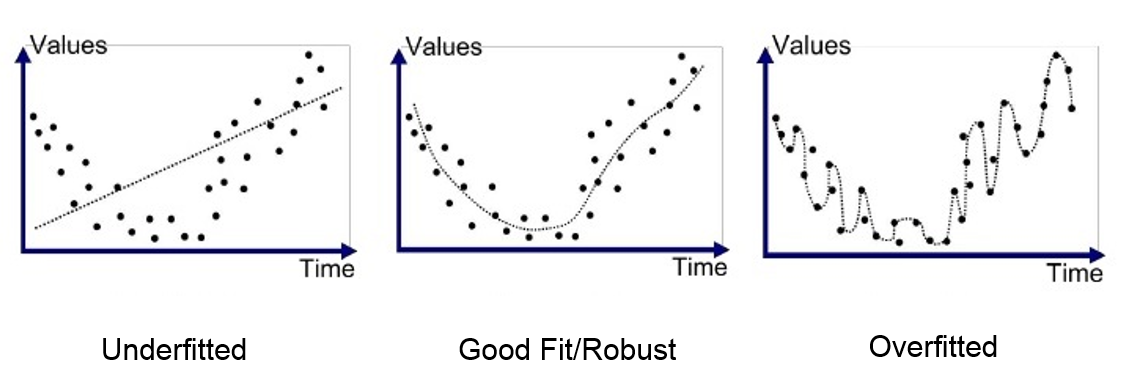

In [196]:
Image('resources/overfit_reg.png', width=700)

### Однако важная мысль: слово `лучше` крайне субъективно. В этом и состоит творческий процесс работы DS. Нам нужно так приблизить функцию, чтобы она удовлетворяла нашим потребностям.

# Accuracy (доля правильных ответов)

Мы пока что только постоянно смотрим на картинки и отвечаем лучше или хуже, а можно ли как-то померить насколько хорошо обучился классификатор?

Для этого существуют метрики классификации, и самая простая метрика - $accuracy$ или доля правльных ответов. Доля правильных ответов - отношение объектов, которые классифицировались правильно, ко всем объектам.

Пусть нам даны $y_{pred}$ и результат нашего алгоритма $y_{prob}$. 

In [251]:
from sklearn.metrics import accuracy_score
y_real = np.array([0, 1, 0, 0, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 0, 1, 1, 0, 0])

accuracy_score(y_real, y_pred)

0.625

In [258]:
np.random.seed(1337)
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2)) #первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2)) #второй класс
X_clf = np.vstack([a, b]) #двумерный количественный признак
y_clf = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

In [260]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf_dtc = DTC(max_depth=3).fit(X_clf, y_clf)
accuracy_score(y_clf, clf_dtc.predict(X_clf))

0.955

# Многоклассовая классификация

## One vs. One, One vs. Rest
Многоклассовая классификация может быть сведена к бинарной различными способами. 

Подход `One vs. Rest`: для каждого класса $i \in \{1, \dots, k\}$ обучим бинарный классификатор $a_i(x) = \mbox{sign}f_i(x)$ на исходной выборке с изменёнными метками (объекты $i$-го класса получают метку 1, все оставшиеся объекты - метку 0), то есть мы учим $a_i$ отличать $i$-ый класс от всех остальных. После чего итоговый классификатор строится как $a(x) = \mbox{argmax}_{i \in \{1, \dots, k\}} f_i(x)$, то есть он выдаёт класс с наибольшей оценкой $f_i(x)$. 

На деле внутри алгоритмов автоматически вызывается `One vs. Rest`, когда отправляем многоклассовые данные.

Подход `One vs. One`: в этом случае мы берем пару классов $(i,j)$ и для каждой пары обучаем классификатор $f_{i,j}$. Получается мы обучаем $\frac{k(k-1)}{2}$ классификаторов, где $k$ - количество классов. После чего итоговый классификатор выбирается так: перебираем все обучанные классификаторы и смотрим за какой класс проголосовало большинство: 
$$a(x) = \mbox{argmax}_{c \in \{1, \dots, k\}}\sum_{i\neq j\in\{1, \dots, k\}} \mathcal{I}(f_{i,j}(x) = c)$$



In [221]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

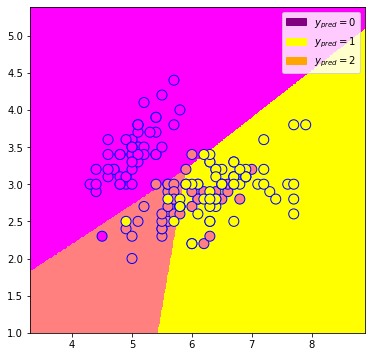

In [240]:
plot_model(X, y, LogisticRegression())

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

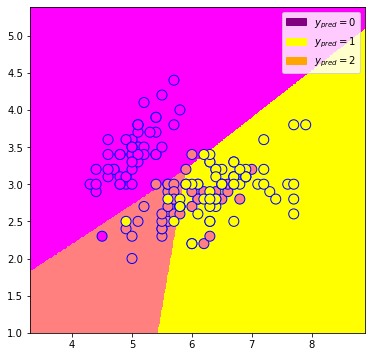

In [241]:
plot_model(X, y, OneVsRestClassifier(LogisticRegression()))

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

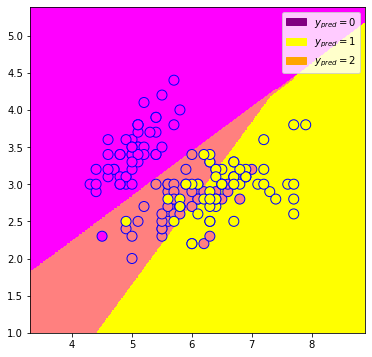

In [242]:
plot_model(X, y, OneVsOneClassifier(LogisticRegression()))

# Unsupervised Learning

На самом деле, формулировка задачи МО, данная в самом начале неполная. Это не все задачи, решаемые с помощью МО.
Мы решали, так называемые задачи "с учителем", когда есть учитель, который говорит какие ответы правильные, а какие нет. 
А что если учителя "нет" и нам самим нужно что-то угадать?

## K-mean

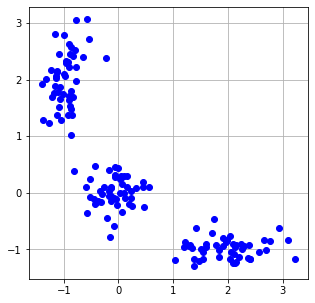

In [6]:
# Начнём с того, что насыпем на плоскость три кластера точек
X_un = np.zeros((150, 2))

np.random.seed(seed=42)
X_un[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X_un[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X_un[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X_un[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X_un[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X_un[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X_un[:, 0], X_un[:, 1], 'bo')
plt.grid()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

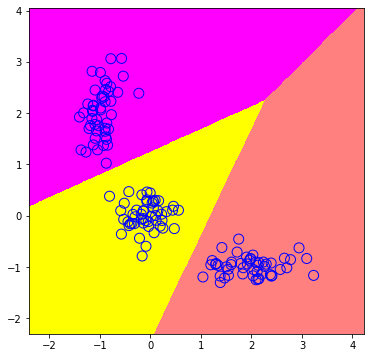

In [7]:
from sklearn.cluster import KMeans
plot_model(X_un, [], KMeans(n_clusters=3))

# Резюме
* Узнали, что такое задача Машинного обучения.
* Поигрались с разными классификаторами и регрессорами
* Гиперпараметры и параметры
* Переобучение и недообучение

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ